<a href="https://colab.research.google.com/github/jaguzman/GENERAL-FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/5_Aprendizaje%20Profundo/AprendizajeProfundo_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APRENDIZAJE PROFUNDO

**Datos Bancarios de Marketing**

El marketing es un componente clave de todas las empresas modernas. Las empresas reinvierten continuamente en marketing, tratando de identificar clientes potenciales. Sin embargo, el costo del marketing puede ser muy alto, lo que significa que la decisión del grupo objetivo es de gran importancia financiera.

Este conjunto de datos fue dispuesto por una empresa minorista que recopiló datos históricos sobre sus clientes divididos en grupos. La empresa realizó un seguimiento de la rentabilidad de cada grupo individual después de una campaña de marketing y evaluó el gasto y retorno de la inversión de marketing para cada grupo.

Información del dataset: https://www.kaggle.com/tsiaras/predicting-profitable-customer-segments?select=customerTargeting.csv


**OBJETIVO**

Crear un modelo de clasificación, basado en redes neuronales, que prediga cuál de los 2 grupos resultará más rentable.

**Contenido**

*   Importar librerías
*   Base de datos
*   Descripción y analítica de datos
*   Preparación de los datos para el algoritmo
*   Redes Neuronales: Clasificador
*   Análisis de desempeño
*   Realizar una predicción
*   Actividad

# **LIBRERÍAS**

In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz

# Librerías de Aprendizaje de máquinas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

# Librerías para evaluar los clasificadores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# **BASE DE DATOS**

In [ ]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/customerTargeting.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números
data.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g1_21,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,g2_21,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.505032,2.551406,6.240000,3.608000,0.744000,1.216000,0.003078,0.003028,0.578205,1.83,6,0,6,7,4,0,0,1,4,-1,3,2.888736,2.616855,5.552000,0.728000,0.160000,0.002994,0.002953,0.586149,3.50,1.97,-1,7,6,0,0,0,1,3.223605,1,-3,-2,0,1,4,2,1,-6,-5,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.718983,3.882271,7.423435,5.048030,0.836178,1.975244,0.784882,0.019448,0.680013,2.80,34,14,48,10,25,16,16,24,9,-8,1,4.065822,4.042015,6.369385,1.511704,1.783791,0.784882,0.033373,0.498949,3.25,1.85,2,1,3,0,0,0,0,1.541039,10,-12,-2,0,12,2,-3,4,-13,-9,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.244550,2.458087,11.091399,5.853005,0.730046,2.022004,0.043937,0.014264,0.527707,1.30,11,18,29,2,13,3,16,1,10,15,25,4.918483,4.050389,10.029408,2.489174,0.204741,0.022247,0.042004,0.567984,5.00,1.70,-5,10,5,0,0,0,1,2.049024,-11,-7,-18,7,-5,-1,-3,-18,-18,-36,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,-3,-4,2.580190,2.683092,9.864426,2.582357,0.656638,1.407549,0.041563,0.021386,0.261785,4.50,5,3,8,17,5,9,7,16,-4,-9,-13,1.964163,2.278147,3.369489,0.665585,2.163561,0.043937,0.010358,0.273886,3.60,1.98,-1,3,2,0,0,0,0,2.284503,5,0,5,-10,0,-3,4,8,1,9,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,-9,-1,3.470617,3.055989,11.672962,4.554560,1.895740,1.237122,0.941241,0.000062,0.390180,3.00,29,23,52,8,31,22,21,23,9,-2,7,4.527831,4.215284,4.494986,1.419174,1.144728,0.364776,0.008148,0.347568,3.40,1.80,-3,2,-1,1,0,0,0,2.648418,0,-13,-13,10,4,-4,-4,10,-18,-8,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


**DESCRIPCIÓN DE LA BASE DE DATOS**

**La base de datos está estructurada de la siguiente manera**

Cada fila es una comparación entre dos grupos de clientes potenciales:

1. Los nombres de columna que comienzan con **"g1"** representan las características del primer grupo de clientes (se conocían antes de que se ejecutara la campaña).

2. Los nombres de columna que comienzan con **"g2"** representan las características del segundo grupo de clientes (se conocían antes de que la campaña fuera correr).

3. Los nombres de columna que comienzan con **"c_"** son características que representan alguna comparación de los dos grupos (también conocidos antes de que se ejecutara la campaña).

**Variable de salida**

La última columna, llamada "target", es categórica, con 3 categorías:

**[0]:** ninguno de los dos grupos fue rentable.

**[1]:** grupo1 resultó ser más rentable.

**[2]:** grupo2 resultó ser más rentable.

# **DESCRIPCIÓN Y ANALÍTICA DE DATOS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

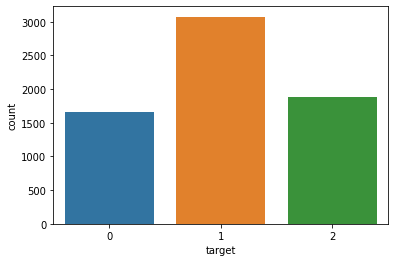

In [ ]:
#Graficar la cantidad de grupos con respecto a su resultado

# Esta función realiza una suma de cada categoría y luego las grafica 
sns.countplot(data['target']) 

# **PREPARACIÓN DE LOS DATOS PARA EL ALGORITMO**

In [ ]:
# Se normalizan los datos

target_column = ['target'] 
predictors = list(set(list(data.columns))-set(target_column))
data[predictors] = data[predictors]/data[predictors].max()
data.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g1_21,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,g2_21,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,0.117773,0.277385,0.223099,0.264996,0.549403,0.219870,0.236303,0.223864,0.272481,0.067730,-0.110438,-0.002270,0.630829,0.609380,0.500860,0.378314,0.301282,0.364064,0.205070,0.058852,0.449405,0.117314,0.274798,0.213161,0.259098,0.551254,0.230174,0.247299,0.227852,0.270009,0.072485,-0.104746,0.002047,0.636691,0.610591,0.360480,0.309278,0.352006,0.205567,0.058207,0.448996,0.205229,0.649430,0.120277,0.119905,0.173464,0.183686,0.200906,0.183686,0.200906,0.364757,0.107450,-0.140250,-0.003011,-0.002325,-0.004013,0.003283,0.003567,0.086642,-0.162628,-0.003076,-0.006080,-0.001529,-0.001388,0.003118,0.000000,-0.018183,-0.012635,0.000612,0.442756,1.031722
std,0.080771,0.205784,0.178387,0.193351,0.281799,0.165410,0.174303,0.165922,0.189745,0.176692,0.276798,0.197846,0.186245,0.165308,0.183420,0.169903,0.156013,0.177895,0.273416,0.151767,0.139392,0.096028,0.197035,0.175566,0.187533,0.283348,0.167302,0.175899,0.174043,0.194449,0.186179,0.268173,0.192640,0.185767,0.164932,0.160174,0.158099,0.172940,0.273798,0.151470,0.139194,0.057535,0.078034,0.312578,0.312109,0.218859,0.387257,0.400708,0.387257,0.400708,0.228176,0.207250,0.275574,0.195550,0.196491,0.277324,0.186564,0.206131,0.162345,0.308895,0.199056,0.253208,0.242978,0.222032,0.241445,0.161435,0.269918,0.236848,0.139141,0.069786,0.731042
min,0.045652,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,-0.562500,-1.225806,-0.855263,0.000000,0.034613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023171,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,-0.574468,-1.161290,-0.807692,0.000000,0.043257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131579,0.000000,-0.769231,-0.769231,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,-0.682927,-1.424242,-0.851351,-0.868421,-1.260870,-0.823529,-1.111111,-0.520000,-1.761905,-0.935185,-0.971578,-0.982609,-0.841247,-1.101848,-1.000000,-1.210149,-1.118416,-1.125000,0.000000,0.000000
25%,0.072478,0.115385,0.085106,0.106383,0.300000,0.081967,0.093023,0.083333,0.115385,-0.041667,-0.258065,-0.108553,0.499821,0.499283,0.415205,0.270721,0.197695,0.244902,0.011054,0.001827,0.348935,0.060976,0.109091,0.063830,0.113402,0.300000,0.098361,0.093023,0.088889,0.100000,-0.042553,-0.258065,-0.102564,0.500000,0.500441,0.258457,0.204211,0.237271,0.011054,0.001827,0.347931,0.171053,0.597938,-0.076923,-0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.168967,0.000000,-0.272727,-0.094595,-0.105263,-0.130435,-0.088235,-0.083333,-0.013333,-0.309524,-0.092593,-0.148597,-0.120835,-0.147435,-0.143721,0.000000,-0.176891,-0.157556,-0.081497,0.394919,0.000000
50%,0.093478,0.250000,0.191489,0.234043,0.550000,0.196721,0.209302,0.187500,0.250000,0.020833,-0.064516,-0.013158,0.581047,0.553559

Se separa la base de datos entre datos de entrenamiento y datos de pruebas (80% - 20%)

In [ ]:
X = data[predictors].values
y = data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
print(X_train.shape); print(X_test.shape)

(5296, 70)
(1324, 70)


**Pasar de variables categórica a variable numéricas**

En este caso se realiza una representación en 3 columnas, uno para cada clase. Para la clase a la que pertenece a una fila, se marca con un 1 en la columna correspondinete, en los demás se coloca un 0.

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Se cuentas en número de clases que han en la base de datos
count_classes = y_train.shape[1]
print(count_classes)

3


# **REDES NEURONALES: CLASIFICADOR**

In [ ]:
# Se inicia el modelo
model = Sequential()

# Se agrega la primer capa con 140 neuronas, función de activación 'relu' y el vector de entrada es de 70 (70 características)
model.add(Dense(140, activation='relu', input_shape=(70,)))

# Se agrega una capa oculta con 280 neuronas y función de activación 'relu'
model.add(Dense(280, activation='relu'))

# Se agrega una capa oculta con 140 neuronas y función de activación 'relu'
model.add(Dense(140, activation='relu'))

# Se agrega la capa final con 3 neuronas (3 clases), función de activación 'sigmoid'
model.add(Dense(3, activation='sigmoid'))

# Se compila el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Se entrena el modelos
print(X_train.shape, y_train.shape)
model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=1)
# batch_size: número de muestras que serán propagadas por la red
# batch_size: muestra el progreso en el entrenamiento de la red neuronal

(5296, 70) (5296, 3)
Epoch 1/20
5296/5296 [==============================] - 0s 66us/step - loss: 0.5800 - accuracy: 0.7041
Epoch 2/20
5296/5296 [==============================] - 0s 40us/step - loss: 0.5485 - accuracy: 0.7327
Epoch 3/20
5296/5296 [==============================] - 0s 40us/step - loss: 0.5402 - accuracy: 0.7390
Epoch 4/20
5296/5296 [==============================] - 0s 40us/step - loss: 0.5355 - accuracy: 0.7394
Epoch 5/20
5296/5296 [==============================] - 0s 39us/step - loss: 0.5328 - accuracy: 0.7437
Epoch 6/20
5296/5296 [==============================] - 0s 38us/step - loss: 0.5309 - accuracy: 0.7419
Epoch 7/20
5296/5296 [==============================] - 0s 48us/step - loss: 0.5294 - accuracy: 0.7428
Epoch 8/20
5296/5296 [==============================] - 0s 37us/step - loss: 0.5248 - accuracy: 0.7483
Epoch 9/20
5296/5296 [==============================] - 0s 39us/step - loss: 0.5205 - accuracy: 0.7491
Epoch 10/20
5296/5296 [=============================

# **ANÁLISIS DE DESEMPEÑO**

In [ ]:
# Imprimir la exactitud del modelo en el entrenamiento y en la prueba
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Exactitud en el entrenamiento: ', scores[1])   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Exactitud en la prueba: ', scores2[1])   

Exactitud en el entrenamiento:  0.7815332412719727
Exactitud en la prueba:  0.7356495261192322


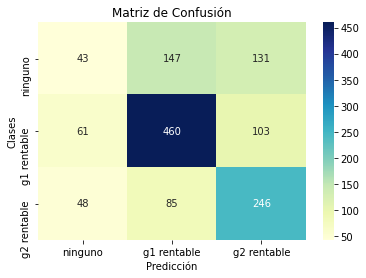

In [ ]:
# Matriz de confusión para el modelo de Árbol de Decisión

# Predicción del modelo
y_pred = model.predict(X_test)
# Matriz de confusión
cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# Nombres de las clases
target_names = ['ninguno', 'g1 rentable', 'g2 rentable']
# Propiedades de la gráfica
ax= plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Matriz de Confusión'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);

# **PREDICCIÓN**

Si se tienen dos grupos nuevos los siguientes datos. ¿A qué clase pertenecen estos 2 grupos?

**[0]:** ninguno de los dos grupos es rentable.

**[1]:** grupo1 es más rentable.

**[2]:** grupo2 es más rentable.

In [ ]:
newG =  np.array ([[ 0.11111111,  0.05613476,  0.1147541 , -0.10666667,  0.18604651,
         0.5535025 ,  0.52794587,  0.27378263, -0.03947368,  1.        ,
         0.13829787,  0.27906977,  0.        ,  0.08333333,  0.54416965,
         0.42974303,  0.06203501,  0.04918033,  0.52848822,  0.16666667,
        -0.02564103,  0.02879231,  0.14126488,  0.09615385,  0.06060606,
         0.01793659, -0.19512195,  0.        ,  0.54358497,  0.36870884,
         0.0702439 ,  0.13877945,  0.06451613,  0.60195296, -0.01740262,
         0.25      ,  0.09677419,  0.35      ,  0.44665573,  0.10869565,
         0.62118674, -0.15789474,  0.        , -0.17391304,  0.17368421,
         0.17021277, -0.08108108,  0.10909091,  0.        , -0.01728713,
        -0.15384615,  0.021068  ,  0.95      ,  0.33495702, -0.07675274,
         0.52497478,  0.19587629, -0.10638298,  0.27659574,  0.        ,
         0.26666667,  0.00759701, -0.00925926,  0.6975945 ,  0.30769231,
         0.39722864,  0.19230769,  0.18      , -0.10416667,  0.05146746]])

In [ ]:
# Se realiza la predicción
prediction = model.predict(newG)
# Se muestra la predicción
prediction

array([[0.5033915 , 0.45842794, 0.08122335]], dtype=float32)

La predicción del modelo dice que ninguno de los dos grupos es rentable.

# **ACTIVIDAD**

1. Crear un modelo de Redes Neuronales cambiando la cantidad neuronas por capa.
2. Crear un modelo de Redes Neuronales agregando otra capa oculta de neuronas.
3. Determine cual de los dos modelos es el mejor.

**Solución 1. modelo de Redes Neuronales cambiando la cantidad neuronas por capa**

In [ ]:
# Se inicia el modelo
model1 = Sequential()

# Se agrega la primer capa con 100 neuronas, función de activación 'relu' y el vector de entrada es de 70 (70 características)
model1.add(Dense(__, activation='__', input_shape=(70,)))

# Se agrega una capa oculta con 100 neuronas y función de activación 'relu'
model1.add(Dense(__, activation='__'))

# Se agrega una capa oculta con 100 neuronas y función de activación 'relu'
model1.add(Dense(__, activation='__'))

# Se agrega la capa final con 3 neuronas (3 clases), función de activación 'sigmoid'
model1.add(Dense(3, activation='sigmoid'))

# Se compila el modelo
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Se entrena el modelos
print(X_train.shape, y_train.shape)
model1.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)

(5296, 70) (5296, 3)
Epoch 1/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5631 - accuracy: 0.7225
Epoch 2/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5496 - accuracy: 0.7319
Epoch 3/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5457 - accuracy: 0.7346
Epoch 4/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5434 - accuracy: 0.7385
Epoch 5/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5408 - accuracy: 0.7395


**Solución 2. Modelo de Redes Neuronales agregando otra capa oculta de neuronas.**

In [ ]:
# Se inicia el modelo
model2 = Sequential()

# Se agrega la primer capa con 100 neuronas, función de activación 'relu' y el vector de entrada es de 70 (70 características)
model2.add(Dense(100, activation='relu', input_shape=(70,)))

# Se agrega la capa final con 3 neuronas (3 clases), función de activación 'sigmoid'
model2.add(Dense(3, activation='sigmoid'))

# Se compila el modelo
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Se entrena el modelos
print(X_train.shape, y_train.shape)
model2.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)

(5296, 70) (5296, 3)
Epoch 1/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5629 - accuracy: 0.7230
Epoch 2/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5507 - accuracy: 0.7319
Epoch 3/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5477 - accuracy: 0.7323
Epoch 4/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5447 - accuracy: 0.7371
Epoch 5/5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.5424 - accuracy: 0.7374


**Solución 3. Comparación de los modelos**

In [ ]:
# Imprimir la exactitud del modelo en el entrenamiento y en la prueba
 
pred_test= __.predict(X_test)
scores1 = __.evaluate(X_test, y_test, verbose=0)
print('Exactitud Modelo 1: ', scores1[1])   

pred_test= model2.predict(__)
scores2 = model2.evaluate(__, __, verbose=0)
print('Exactitud Modelo 2: ', scores2[1]) 

Exactitud Modelo 1:  0.746223509311676
Exactitud Modelo 2:  0.7452166080474854
